In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from scipy import stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipldata/deliveries.csv
/kaggle/input/ipldata/matches.csv


In [111]:
matches = pd.read_csv("../input/ipldata/matches.csv")
deliveries = pd.read_csv('../input/ipldata/deliveries.csv')
print('Number of rows:',len(matches))
print('Number of columns:', len(matches.columns))
matches.head()

Number of rows: 756
Number of columns: 18


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [112]:
#measuring center
win_by_runs_data = matches[matches['win_by_runs']>0].win_by_runs
print('Number of rows:',len(win_by_runs_data))
win_by_runs_data.head()

Number of rows: 337


0     35
4     15
8     97
13    17
14    51
Name: win_by_runs, dtype: int64

In [113]:
#Arithmtic mean of the given data to calculate average winning margin of all the matches played in which team batting first 
win_by_runs_arithmetic_mean = win_by_runs_data.mean()
print('Arithmetic mean:',win_by_runs_arithmetic_mean)

Arithmetic mean: 29.798219584569733


In [114]:
#Median of all entries will be... 
win_by_runs_median = win_by_runs_data.median()
print('Median of all entries:',win_by_runs_median)

Median of all entries: 22.0


In [115]:
#mode - the most frequent occuring win percentage let's have a look...
win_by_runs_mode = win_by_runs_data.mode()
print('Mode is:',win_by_runs_mode)

Mode is: 0    14
dtype: int64


In [116]:
#range of runs where matches was so close...
win_by_runs_max = win_by_runs_data.max()
win_by_runs_min = win_by_runs_data.min()
win_by_runs_range = win_by_runs_max - win_by_runs_min

print('Largest:',win_by_runs_max,'Smallest:',win_by_runs_min,'Range:',win_by_runs_range)

Largest: 146 Smallest: 1 Range: 145


In [117]:
#Interquartile Range(IQR) is the amount spread in middle 50% of the dataset...let's calculate 

#from scipy import stats - to calculate percentile use scoreatpercentile...
win_by_runs_25_per = stats.scoreatpercentile(win_by_runs_data,25) #25% of the matches are won by less than 11 runs 

win_by_runs_75_per = stats.scoreatpercentile(win_by_runs_data,75) #75% of the matches are won by less than 38 runs

win_by_runs_iqr = stats.iqr(win_by_runs_data)
print('Q1 (25th percentile) =',win_by_runs_25_per)
print('Q3 (75th percentile) =',win_by_runs_75_per)
print(f'IQR = Q3-Q1 = {win_by_runs_75_per} - {win_by_runs_25_per} = {win_by_runs_iqr}')





Q1 (25th percentile) = 11.0
Q3 (75th percentile) = 39.0
IQR = Q3-Q1 = 39.0 - 11.0 = 28.0


In [118]:
#Variance and Standard deviation - Standard deviation and variance measures the spread of a datase.
#If the data is spread out largely, standard deviation and variance is greater i.e - 
#if more data points are close to the mean, standard deviation is less
#if data points are further from the mean, standard deviation is more
win_by_wickets_data  = matches[matches.win_by_wickets >0].win_by_wickets
#print('Number of rows =',len(win_by_wickets_data))
#win_by_wickets_data.head()
#let's calculate Standard deviation by formula...
#step - 1 calculate mean
win_by_wickets_mean = win_by_wickets_data.mean()
print('Mean:',win_by_wickets_mean)

#step-2 calcualting numerator part sum of (x-mean)
win_by_wickets_var_numerator = sum([(x-win_by_wickets_mean)**2 for x in win_by_wickets_data])

#step-3 Now variance
win_by_wickets_variance = win_by_wickets_var_numerator/len(win_by_wickets_data)
print('Variance:',win_by_wickets_variance)

#step-4 calculate standard deviation
win_by_wickets_standard_deviation = math.sqrt(win_by_wickets_variance)
print('Standard Deviation',win_by_wickets_standard_deviation)

Mean: 6.238916256157635
Variance: 3.3246924215583893
Standard Deviation 1.8233739116150558


In [119]:
#i.e. matches are won by an average of 6.23 wickets with standard deviation of 1.82

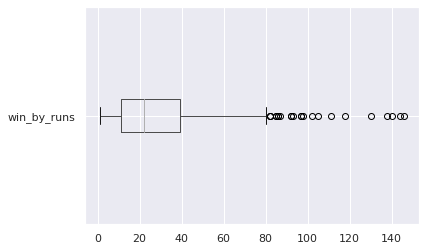

In [120]:
#BOX AND WHISKER PLOT 
win_by_runs_data.to_frame().boxplot(vert = False)


In [121]:
#IPL ANALYSIS 

In [122]:
data  = pd.read_csv('../input/ipldata/matches.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

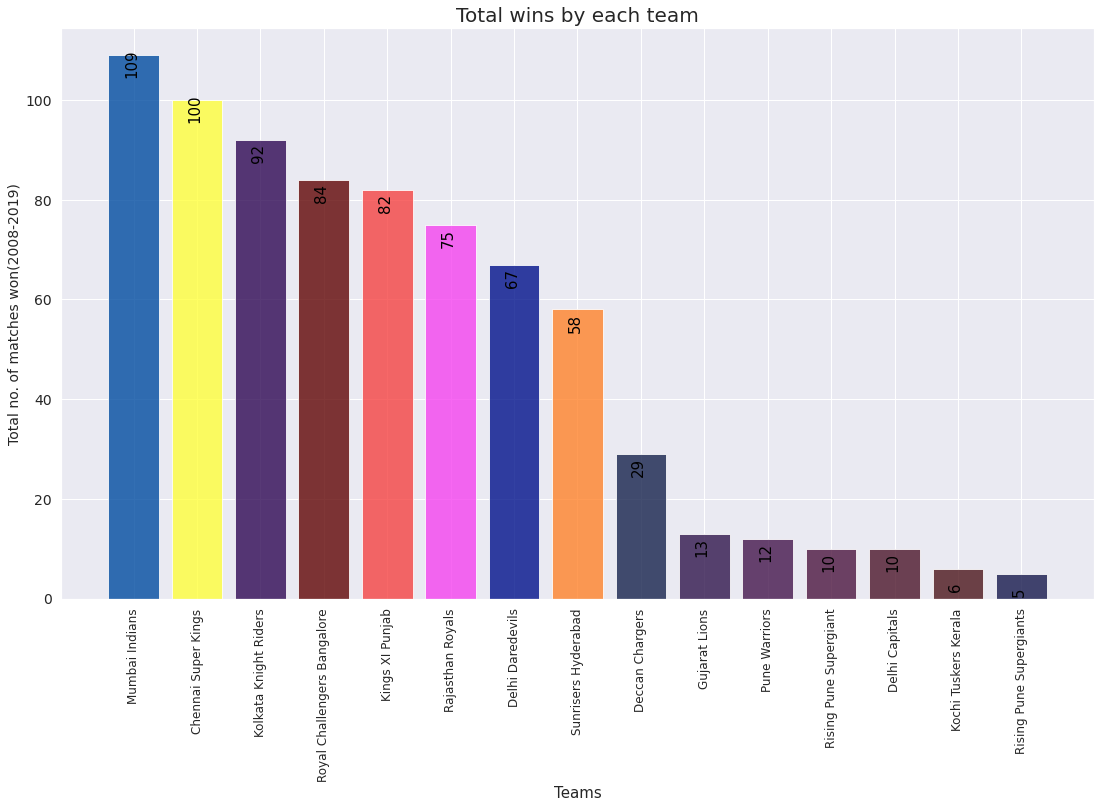

In [123]:
#Total no. of wins by each team
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
wins = pd.DataFrame(data['winner'].value_counts())

wins['name'] = wins.index
plt.xticks(rotation=90,fontsize = 12)
plt.yticks(fontsize = 14)
plt.bar(wins['name'],
           wins['winner'],
       color=['#004BA0','#FFFF3C','#2E0854','#610505','#f54242','#f542ef','#00118B','#FF822A','#15224c','#30154c','#44154c',
             '#4c153f','#4c152a','#4c151b','#15184c'],alpha = 0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation = 90)
    count+=1
plt.title('Total wins by each team',fontsize = 20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize = 14)
plt.show()


In [124]:
#tOP 20 PLAYERS WITH MOST MAN OF THE MATCH AWARDS
n = 20
players = pd.DataFrame(data['player_of_match'].value_counts())
players['name'] = players.index
players = players.head(n)
players

,player_of_match,name
CH Gayle,21,CH Gayle
AB de Villiers,20,AB de Villiers
RG Sharma,17,RG Sharma
MS Dhoni,17,MS Dhoni
DA Warner,17,DA Warner
YK Pathan,16,YK Pathan
SR Watson,15,SR Watson
SK Raina,14,SK Raina
G Gambhir,13,G Gambhir
MEK Hussey,12,MEK Hussey


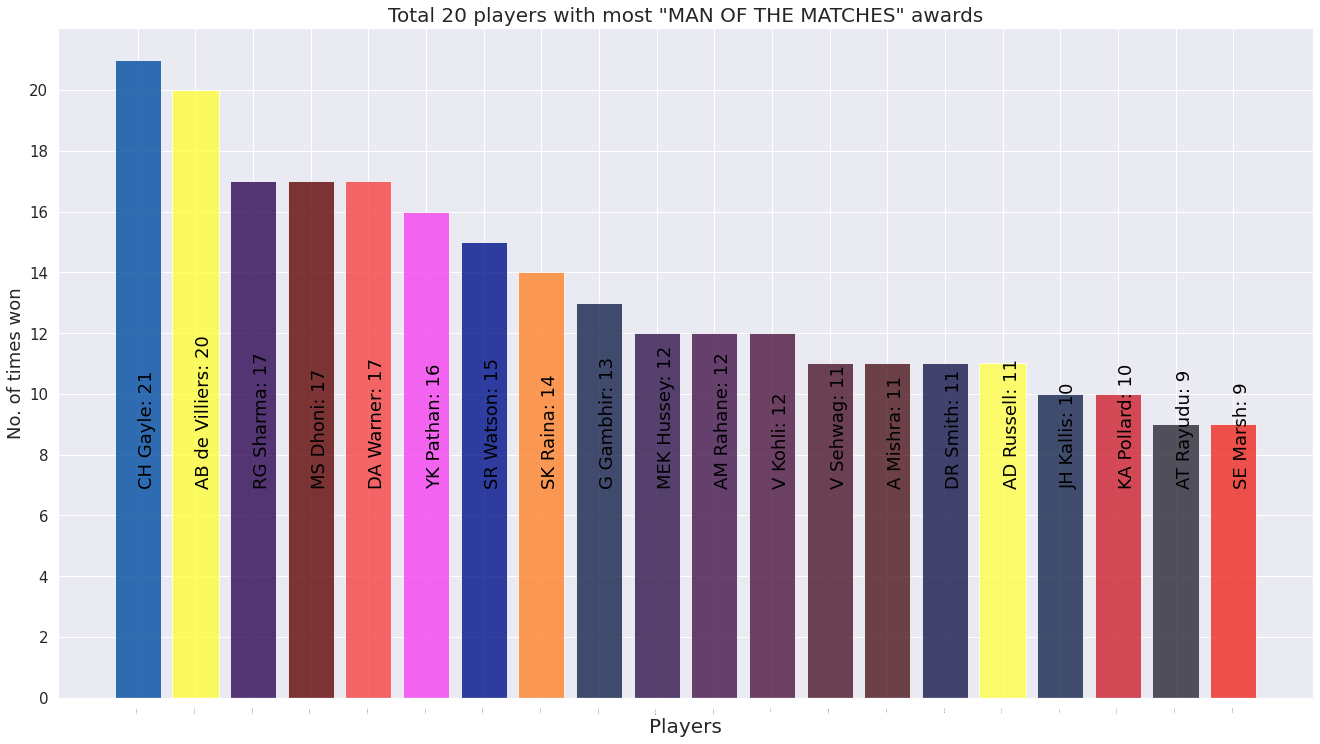

In [125]:
#Let's make a graph of above data 
n = 20
players = pd.DataFrame(data['player_of_match'].value_counts())
players['name'] = players.index
players = players.head(n)
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)

plt.xticks(rotation=90,fontsize = 0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize = 15)
plt.bar(players['name'],
           players['player_of_match'],
       color=['#004BA0','#FFFF3C','#2E0854','#610505','#f54242','#f542ef','#00118B','#FF822A','#15224c','#30154c','#44154c',
             '#4c153f','#4c152a','#4c151b','#15184c','#FFFF48','#15244C','#CD202D','#292734','#EF2920'],alpha = 0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation = 90,color='black',size = 18)
    count+=1
plt.title('Total 20 players with most "MAN OF THE MATCHES" awards',fontsize = 20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize = 18)
plt.tight_layout()
plt.show()


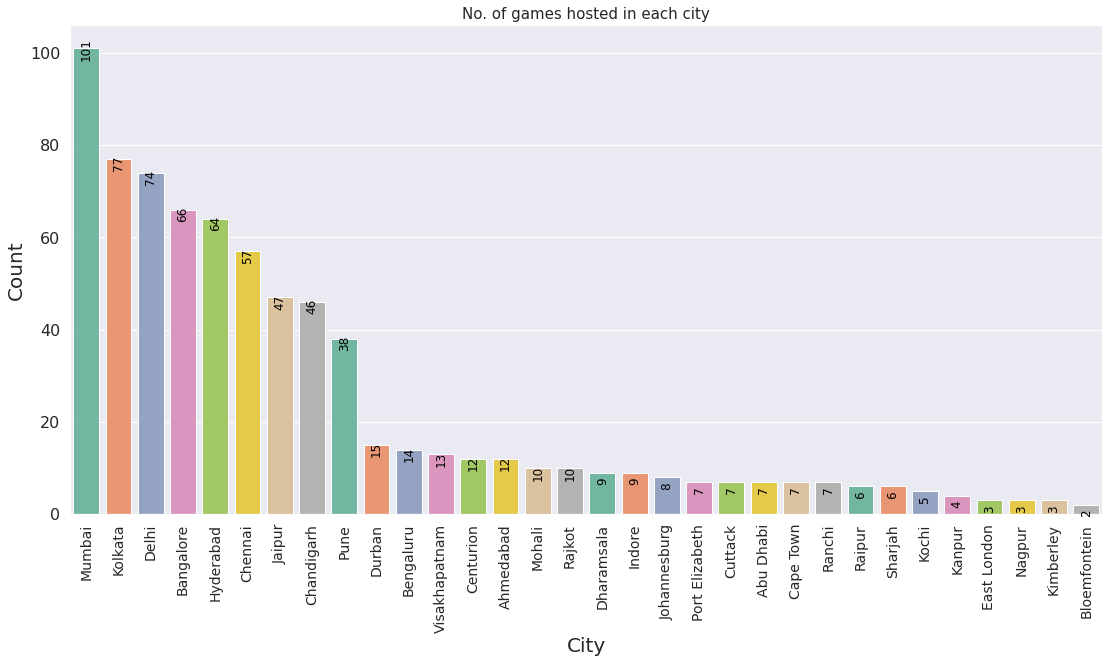

In [126]:
#Matches hosted in each city
fig=plt.gcf()
fig.set_size_inches(18.5,9)
sns.countplot(data['city'],order = data['city'].value_counts().index,palette = 'Set2')
plt.xticks(rotation= 90,fontsize = 14)
plt.yticks(fontsize = 16)
plt.xlabel('City',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.title('No. of games hosted in each city',fontsize=15)
count = 0
cities = pd.DataFrame(data['city'].value_counts())

cities['name']=data['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color= 'black',size =12)
    count+=1
plt.show()



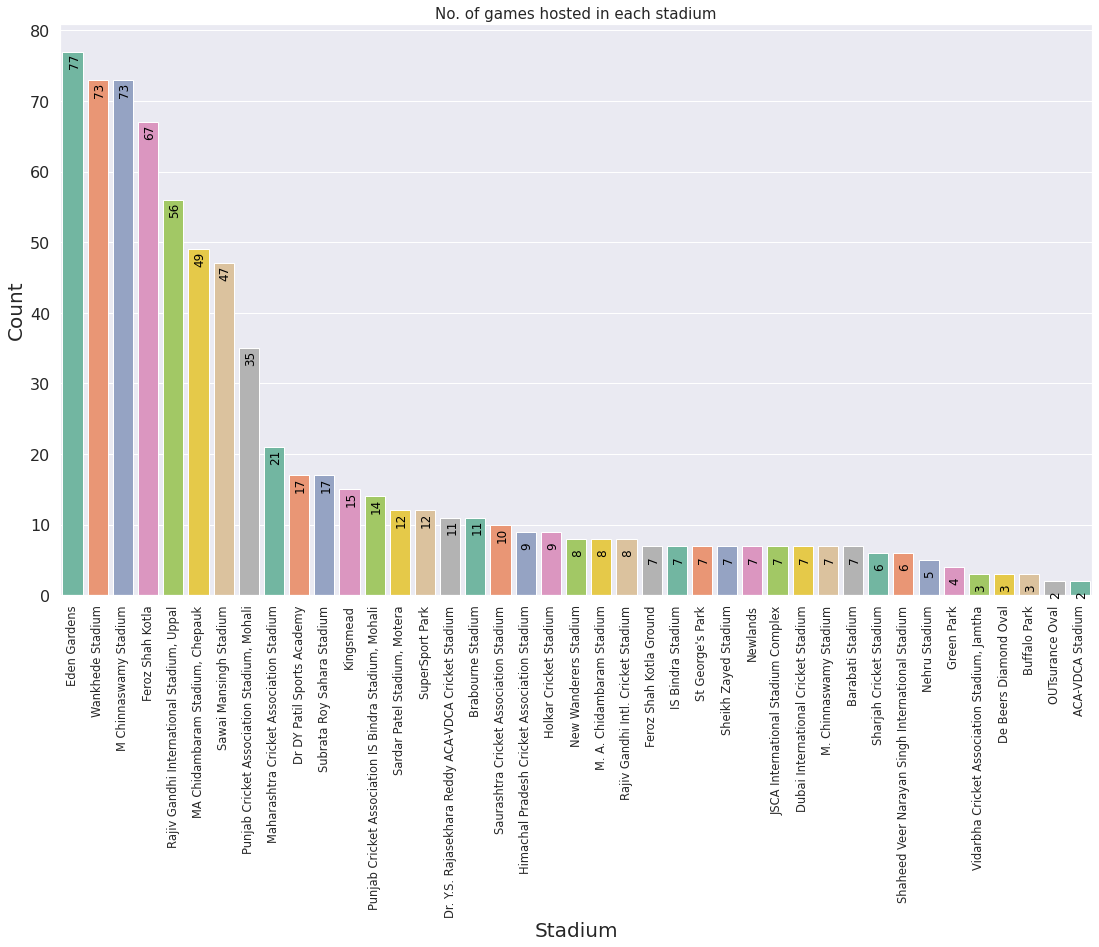

In [127]:
#No. of matches hosted at each stadium
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.countplot(data['venue'],order = data['venue'].value_counts().index,palette = 'Set2')
plt.xticks(rotation= 90,fontsize = 11.5)
plt.yticks(fontsize = 16)
plt.xlabel('Stadium',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.title('No. of games hosted in each stadium',fontsize=15)
count = 0
venues = pd.DataFrame(data['venue'].value_counts())

venues['name']=data['venue'].value_counts().index
for i in venues['venue']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color= 'black',size =12)
    count+=1
plt.show()

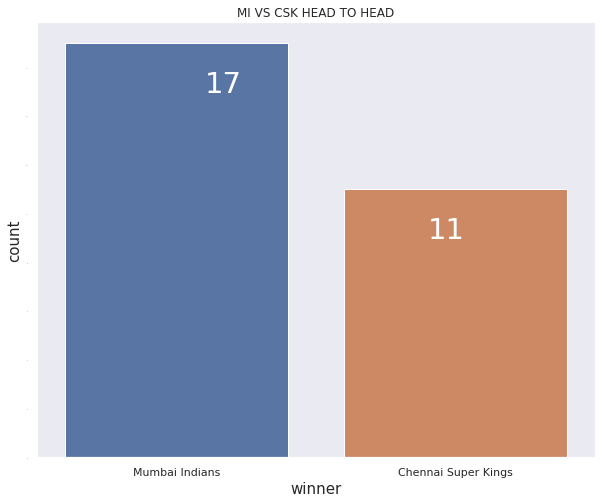

In [128]:
#My one of the favourite team is CSK and another one is MI, so let's analyse the given data between these two teams...super excited

#MI VS CSK HEAD TO HEAD

micsk=data[np.logical_or(np.logical_and(data['team1']=='Mumbai Indians',data['team2']=='Chennai Super Kings'),np.logical_and(data['team2']=='Mumbai Indians',data['team1']=='Chennai Super Kings'))]

sns.set(style='dark')
fig = plt.gcf()
fig.set_size_inches(10,8)

sns.countplot(micsk['winner'],order = micsk['winner'].value_counts().index)
plt.text(0.1,15,str(micsk['winner'].value_counts()['Mumbai Indians']),size=29,color='white')
plt.text(0.9,9,str(micsk['winner'].value_counts()['Chennai Super Kings']),size=29,color='white')

plt.xlabel('winner',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.yticks(fontsize=0)
plt.title('MI VS CSK HEAD TO HEAD')
plt.show()


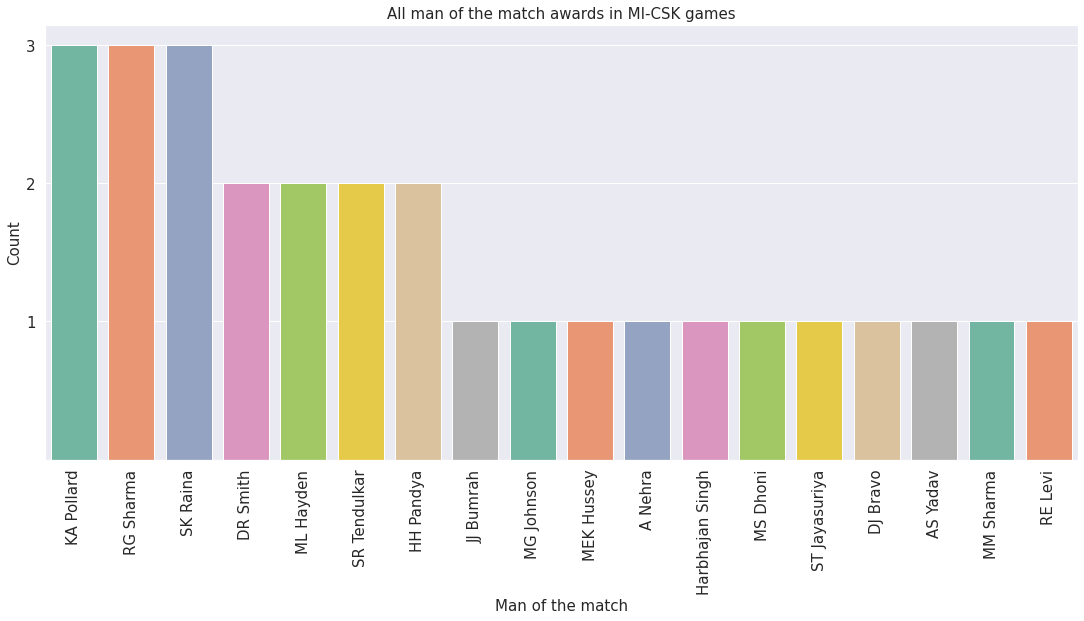

In [129]:
#MI VS CSK - BEST PERFORMERS
sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(18.5,8)

sns.countplot(micsk['player_of_match'],order = micsk['player_of_match'].value_counts().index,palette='Set2')
plt.title('All man of the match awards in MI-CSK games',fontsize = 15)
plt.yticks([1,2,3],[1,2,3],fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Man of the match',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()


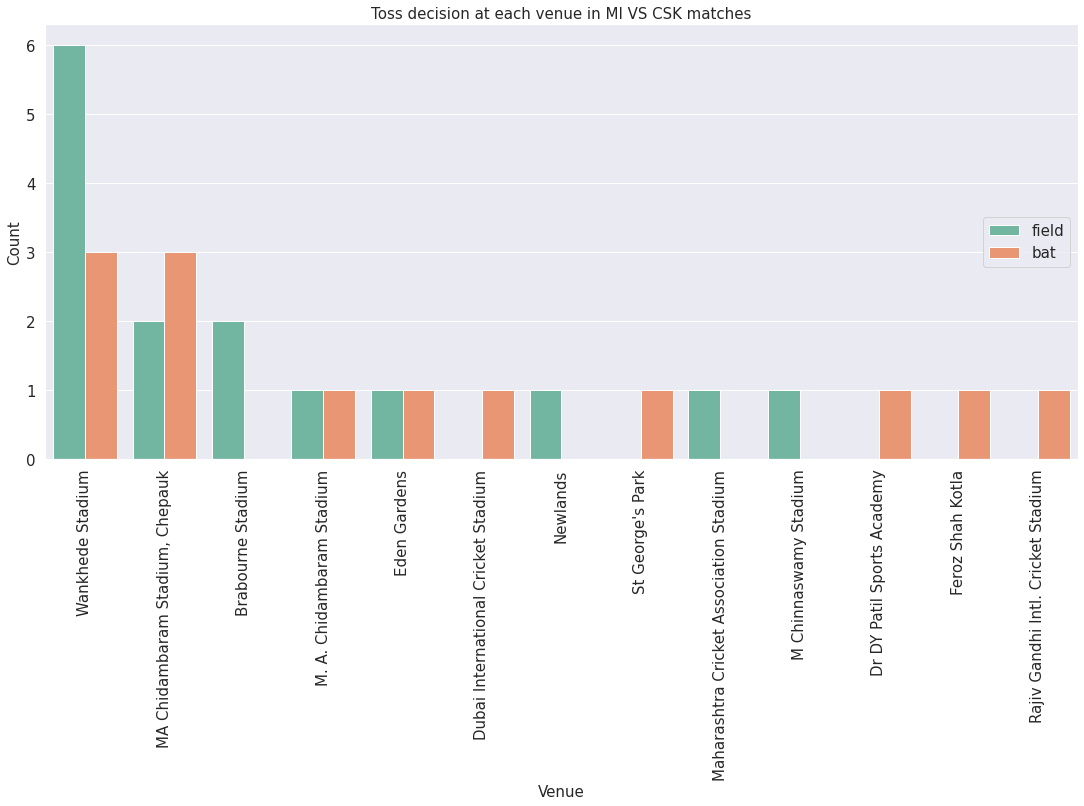

In [130]:
#Toss decision statistics for all MI VS CSK matches - Venue Wise
sns.set(style= 'darkgrid')
fig = plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['venue'],order= micsk['venue'].value_counts().index,palette='Set2',hue=data['toss_decision'])
plt.title('Toss decision at each venue in MI VS CSK matches',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Venue',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=5,fontsize=15)
plt.show()


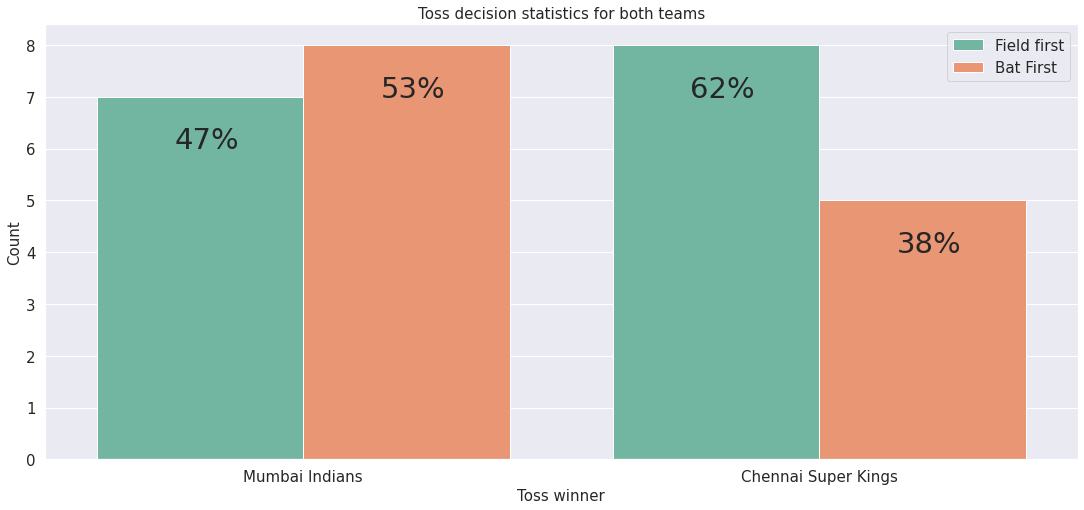

In [131]:
#Decision upon winning the toss by both teams 
sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['toss_winner'],order=micsk['toss_winner'].value_counts().index,palette='Set2',hue=data['toss_decision'])
plt.title('Toss decision statistics for both teams',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.text(-0.25,6,str(int((7/15)*100)+1)+'%',fontsize=29)
plt.text(0.15,7,str(int((8/15)*100))+'%',fontsize=29)
plt.text(0.75,7,str(int((8/13)*100)+1)+'%',fontsize=29)
plt.text(1.15,4,str(int((5/13)*100))+'%',fontsize=29)
plt.legend(['Field first','Bat First'],loc = 'best',fontsize=15)
plt.show()

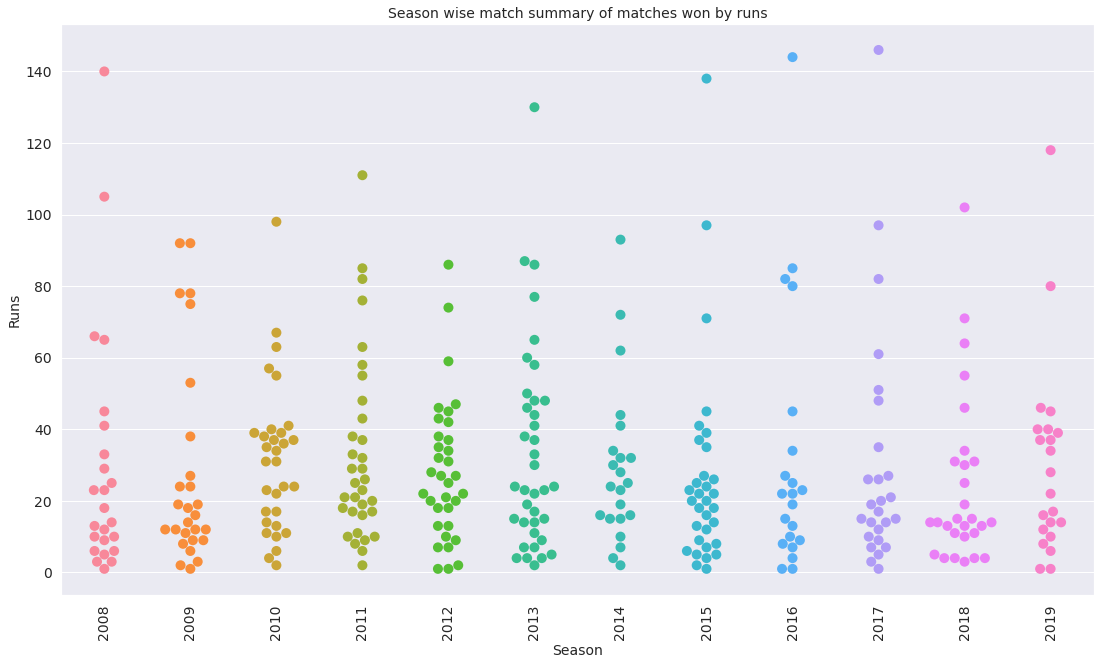

In [132]:
#season wise match summary of matches won by runs 
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.swarmplot(data['season'],data[data['win_by_runs']!=0]['win_by_runs'],s=10)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Season wise match summary of matches won by runs',fontsize=14)
plt.show()

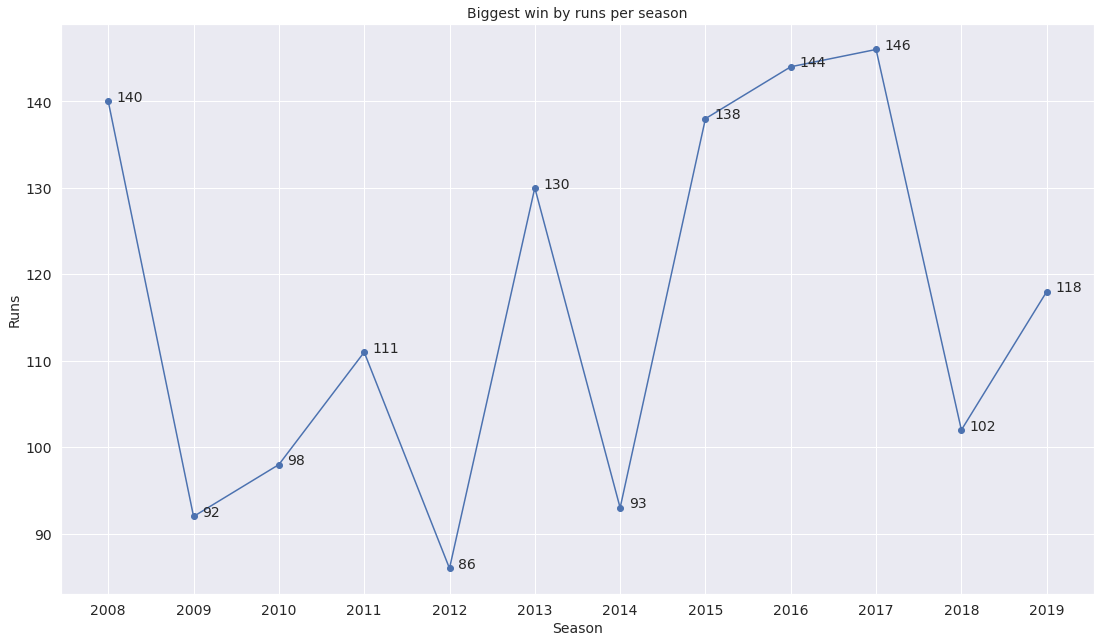

In [133]:
#biggest win by runs each season 
s = 2008
season = []
win_by_runs_max = []
while s<2020:
    season.append(s)
    win_by_runs_max.append(data[data['season']==s]['win_by_runs'].max())
    s+=1
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(season, win_by_runs_max)
plt.scatter(season, win_by_runs_max)
count = 0
while(count<12):
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Biggest win by runs per season',fontsize=14)
plt.show()